### Setup

In [1]:
import pickle,gzip,math,os,time,shutil,torch,matplotlib as mpl, numpy as np
import pandas as pd,matplotlib.pyplot as plt
from pathlib import Path
from torch import tensor
from torch import nn

from torch.utils.data import DataLoader,default_collate
from typing import Mapping

from miniai.training import *
from miniai.datasets import *

mpl.rcParams['image.cmap'] = 'gray'

### Get data

In [2]:
MNIST_URL='https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
path_data = Path('data')
path_data.mkdir(exist_ok=True)
path_gz = path_data/'mnist.pkl.gz'

if not path_gz.exists():
    urlretrieve(MNIST_URL, path_gz)

with gzip.open(path_gz, 'rb') as f: 
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')
x_train, y_train, x_valid, y_valid = map(tensor, [x_train, y_train, x_valid, y_valid])

### Understanding convolutions

In [3]:
train_imgs = x_train.view(-1, 28, 28)
valid_imgs = x_valid.view(-1, 28, 28)

train_imgs.shape, valid_imgs.shape

(torch.Size([50000, 28, 28]), torch.Size([10000, 28, 28]))

<AxesSubplot:>

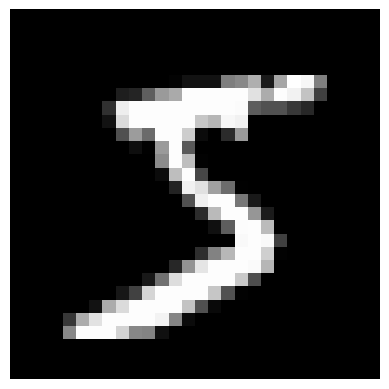

In [4]:
img = train_imgs[0]
show_image(img)

<AxesSubplot:>

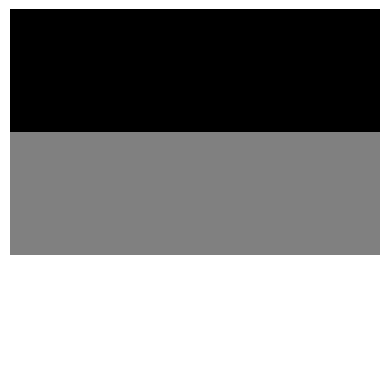

In [5]:
top_edge = tensor(
    [
        [-1,-1,-1],
        [ 0, 0, 0],
        [ 1, 1, 1]
    ]
).float()

show_image(top_edge)

In [6]:
df = pd.DataFrame(img[:13,:23])
df.style.format(precision=2).set_properties(**{'font-size':'7pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.)
1,tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.)
2,tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.)
3,tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.)
4,tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.)
5,tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.0117),tensor(0.0703),tensor(0.0703),tensor(0.0703),tensor(0.4922),tensor(0.5312),tensor(0.6836),tensor(0.1016),tensor(0.6484),tensor(0.9961),tensor(0.9648)
6,tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.1172),tensor(0.1406),tensor(0.3672),tensor(0.6016),tensor(0.6641),tensor(0.9883),tensor(0.9883),tensor(0.9883),tensor(0.9883),tensor(0.9883),tensor(0.8789),tensor(0.6719),tensor(0.9883),tensor(0.9453),tensor(0.7617)
7,tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.1914),tensor(0.9297),tensor(0.9883),tensor(0.9883),tensor(0.9883),tensor(0.9883),tensor(0.9883),tensor(0.9883),tensor(0.9883),tensor(0.9883),tensor(0.9805),tensor(0.3633),tensor(0.3203),tensor(0.3203),tensor(0.2188),tensor(0.1523)
8,tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.0703),tensor(0.8555),tensor(0.9883),tensor(0.9883),tensor(0.9883),tensor(0.9883),tensor(0.9883),tensor(0.7734),tensor(0.7109),tensor(0.9648),tensor(0.9414),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.)
9,tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.3125),tensor(0.6094),tensor(0.4180),tensor(0.9883),tensor(0.9883),tensor(0.8008),tensor(0.0430),tensor(0.),tensor(0.1680),tensor(0.6016),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.)


In [7]:
def apply_kernel(img, row, col, kernel):
    return (img[row-1:row+2, col-1:col+2] * kernel).sum()

In [8]:
apply_kernel(img, 5, 9, top_edge)

tensor(0.6250)

<AxesSubplot:>

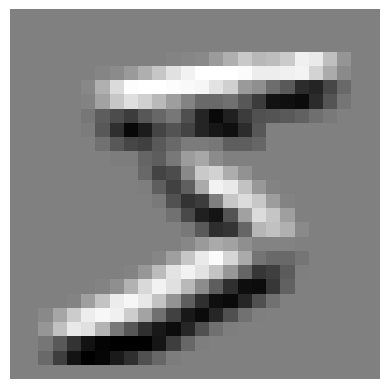

In [9]:
rng = range(1, 27)
top_edge_img = tensor([[apply_kernel(img, i, j, top_edge)for j in rng] for i in rng])
show_image(top_edge_img)

<AxesSubplot:>

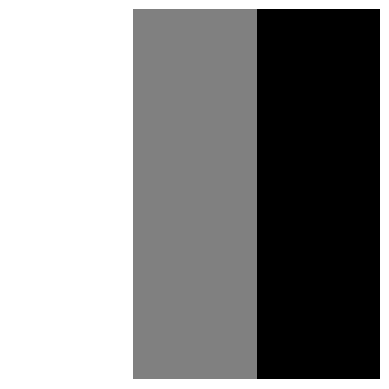

In [10]:
right_edge = tensor(
    [
        [1, 0, -1],
        [1, 0, -1],
        [1, 0, -1]
    ]
).float()

show_image(right_edge)

<AxesSubplot:>

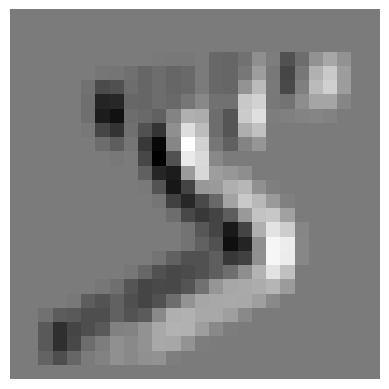

In [11]:
rng = range(1, 27)
right_edge_img = tensor([[apply_kernel(img, i, j, right_edge)for j in rng] for i in rng])
show_image(right_edge_img)